#HW3 - Interference and Diffraction

In [2]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

The wave nature of light leads to one of its most useful properties - interference. Since light is an oscillating electric field and since the net electric field is the sum of the electric fields from all sources, one can have any degree of constructive and destructive interference. The light field radiated by one dipole can be described by

\begin{equation}\Large
E(z, t) = E^0(t)e^{i\left(\vec{k} \cdot \vec{z} -\omega t\right)}
\end{equation}

and that radiated by many dipoles can be described by

\begin{equation}\Large
E(z, t) = \sum_n E^0(t) e^{i\left(\vec{k_n} \cdot \vec{z_n} -\omega_n t_n\right)}
\end{equation}

The intensity (mks units) is calculated by finding

\begin{equation}\Large
I = \frac{c \epsilon_0 n_{\mathrm{index}} \xi}{2}|E(z, t)|^2
\end{equation}

The cross-terms that result from $|E(z, t)|^2$ represent the interference between the two waves. For two waves,

\begin{equation}\Large
E(z, t) = E^0_1(t) e^{i\left(\vec{k_1} \cdot \vec{z_1}-\omega_1 t_1\right)} + E^0_2(t) e^{i\left(\vec{k_2} \cdot \vec{z_2}-\omega_2 t_2\right)} 
\end{equation}

and the cross-terms have the form

\begin{equation}\Large
E^0_1(t)E^0_2(t)e^{i\left(\vec{k_1}\cdot\vec{z_1}-\vec{k_2}\cdot\vec{z_2}-\omega_1 t_1 + \omega_2 t_2\right)}
\end{equation}

If $t_1=t_2$ and $\omega_1=\omega_2$, this equation predicts interference fringes that depend on $\vec{k_1}\cdot\vec{z_1}-\vec{k_2}\cdot\vec{z_2}$. This homework looks at different cases for these spatial fringes.

One can also have temporal fringes that are the analog of spatial fringes. In this case, we would keep constant values of $z$, $k$, and $\omega$ and examine how the electric field and the intensity vary in time. Temporal fringes play the central role in making femtosecond ultrafast laser pulses. But we will concentrate on spatial fringes.

##1 
The guidelines for understanding the behavior of interference patterns state that the direction of the maxima where there is constructive interference depends upon the minimum path difference between pathways while the sharpness of the maxima depends up on the maximum path difference. This problem is intended to examine the truth of these guidelines by creating cases where either the cases have the same minimum path differences or the same maximum path differences.

Consider two infinitely thin slit sources seperated by a distance, $d$. They emit light coherently at 500 nm so they have the same values of $\omega$ and they are measured at the same time $(t_1=t_2)$. Their light appears on a screen that is 1 meter from the sources.

##1a
Assume $d$=5 microns. Use the condition for constructive interference to predict the positions of the n=0, 1, and 2 orders of interference (i.e. the number of addtional oscillations that one beam experiences because of the additional travel distance).

##1b
Develop a condition for destructive interference and predict the position for the destructive interference that occurs between n=0, 1, and 2. What is the physical distance (in cm) between having maximum constructive and destructive interference?

##1c
Change d to 20 microns and predict the position for constructive and destructive interference for n between 0 and 5.

##1d
One of the fringes for this case overlaps with a fringe that you calculated for the $d$=5 micron case. Which fringe overlaps?

##1e
Calculate the physical distance between the constructive and destructive interference for the n=4 fringe when $d$=20 microns. If you compare the value with that calculated in part b, you will see that the fringes are much sharper.

##1f
Create a graph of the interference pattern on the screen for the d=5 microns and d=20 microns cases described above and a third case where there are 8 slits spaced 5 microns apart. Compare the three cases to identify the positions of the fringes and their sharpness. The point of this excersize is to demonstrate that the position of fringes is defined by the shortest path-length while the sharpness is defined by the longest path-length. Present a physical mechanism that explains why this rule is true.

You are given an example for the case of 6 slits spaced 5 microns apart. You will modify this example for this question as well as questions 2 and 3.

(6L, 500L)


C:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


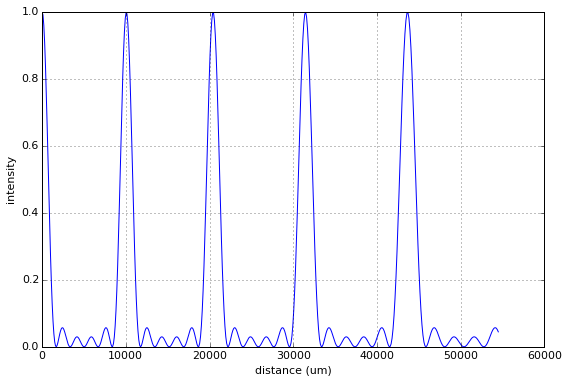

In [11]:
wavelength = 0.5  # um

# source
n_sources = 6
d_sources = 5  # um
source_coords = np.zeros((3, n_sources))
source_coords[2] = np.arange(n_sources) * d_sources
# the second dimension of coordinate arrays corresponds to the x, y, and z positions
# so the source array will have shape (3, n_sources)

# screen
dist = 1e5  # um
n_screen_points = 500
theta = 0.001
screen_coords = np.zeros((3, n_screen_points))
screen_coords[0] = dist
screen_coords[2] = dist*np.tan((np.arange(n_screen_points)*theta))

# distances between source and screen
delta = np.sqrt(np.sum((source_coords[:, :, None]-screen_coords[:, None, :])**2, axis=0))
print delta.shape
# the delta array has shape (n_sources, n_screen_points)

# electric field
E = np.sum(np.exp(2*np.pi*1j*delta/wavelength), axis=0)
# the electric field is calculated for each screen point

# normalized intensity
I = E*np.conj(E) / (n_sources)**2

# plot
plt.plot(screen_coords[2], I)
plt.xlabel('distance (um)')
plt.ylabel('intensity')
plt.grid()

##2
The diffraction pattern in the far field for a single slit can be described by a series of closely space sources (the actual spacing is irrelevant as long as it is sufficiently small). Create the single slit diffraction pattern for a 5 micron slit.

##3
Using the same strategy, define the diffraction pattern for two 5 micron slits that are 25 microns apart.